In [ ]:
# Obeservation des effets de variation des paramètres les plus Pertinents (ACTIVATION, SOLVER, Learning_rate, 
# Max_iter) indépendamment des autres paramètres sur la métrique de qualité LOSS (fonction de perte) tels que 
# Plus le résultat de cette fonction est minimisé, plus le réseau de neurones est performant. 
# Et cela pour chacun des deux datasets : de classification (breast_cancer) et de la régression (diabetes).   


 #Effets de variation du paramètre Activation sur la métrique de qualité sélctionnée : loss avant (Resp aprés) la normalisation de la métriques sur le dataset de classification breast_cancer (Resp le dataset de régression diabetes)
_________________________________________________________________________________________
Apprentissage avec la fonction d'activation identity
Loss (CLASSIFICATION) : 3.824846
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Apprentissage avec la fonction d'activation logistic
Loss (CLASSIFICATION) : 3.815127
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Apprentissage avec la fonction d'activation tanh
Loss (CLASSIFICATION) : 3.847297
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Apprentissage avec la fonction d'activation relu
Loss (CLASSIFICATION) : 3.890057
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

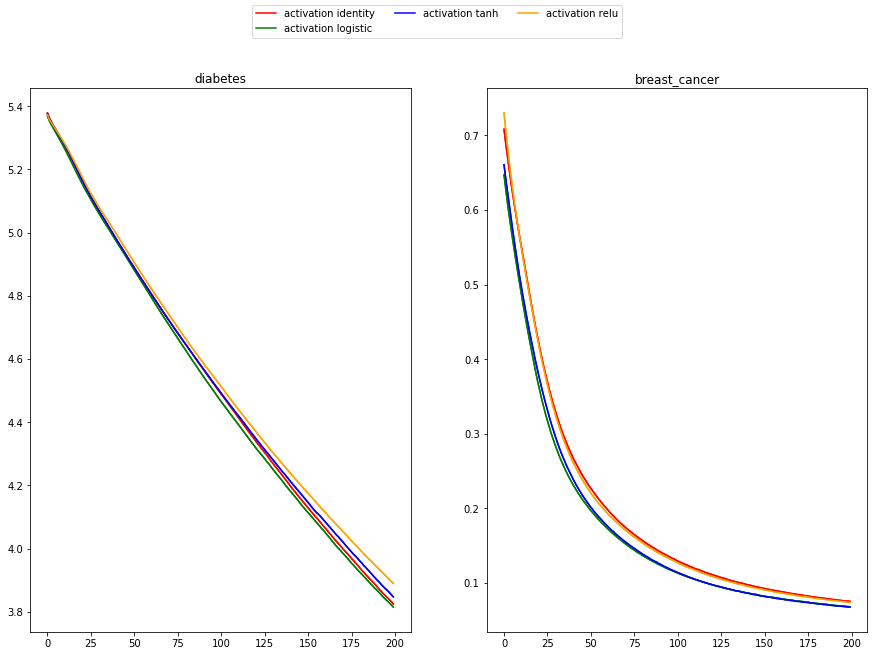

In [58]:
################################################################################################################
#########################################      1. ACTIVATION        ############################################
################################################################################################################

import warnings
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# Les 4 différentes valeurs du parametre Activation
params = [
    {"activation": "identity",},
    {"activation": "logistic",},
    {"activation": "tanh",},
    {"activation": "relu",},
]  
labels = [
    "activation identity",
    "activation logistic",
    "activation tanh",
    "activation relu",
]
plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "orange", "linestyle": "-"},
]

# pour chaque dataset, voir les Effets de variation du paramètre Solver sur la métrique de qualité : loss 
print("\n #Effets de variation du paramètre Activation sur la métrique de qualité sélctionnée : loss avant (Resp aprés) la normalisation de la métriques sur le dataset de classification breast_cancer (Resp le dataset de régression diabetes)")

def plot_on_dataset(X, y, ax, name):

    print('_________________________________________________________________________________________')
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    
    #CLASSIFICATION
    for label, param in zip(labels, params):
        print("Apprentissage avec la fonction d'%s" % label)
        mlp = MLPClassifier()

        #certaines combinaisons de paramètres ne convergeront pas comme on peut le voir sur les grapges 
        #donc elles seront ignorées ici
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)


        mlps.append(mlp)
        #print("Score (CLASSIFICATION): %f" % mlp.score(X, y))
        print("Loss (CLASSIFICATION) : %f" % mlp.loss_)
        print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)

    print('_________________________________________________________________________________________')
    

    #REGRESSION
    for label, param in zip(labels, params):
        print("Apprentissage avec la fonction d'%s" % label)
        mlp = MLPRegressor()

        #certaines combinaisons de paramètres ne convergeront pas comme on peut le voir sur les grapges 
        #donc elles seront ignorées ici
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        #print("Score (REGRESSION): %f" % mlp.score(X, y))
        print("Loss (REGRESSION): %f" % mlp.loss_)
        print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)
         #ax.plot(mlp.score_curve_, label=label, **args)


#visualiser les deux graphes sur la meme ligne
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
#télécharger datasets
diabetes = datasets.load_diabetes()
breast_cancer = datasets.load_breast_cancer()
data_sets = [
    (diabetes.data, diabetes.target),
    (breast_cancer.data, breast_cancer.target),
]

for ax, data, name in zip(
    axes.ravel(), data_sets, ["diabetes", "breast_cancer"]
):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()


 #Effets de variation du paramètre Solver sur la métrique de qualité sélctionnée : loss avant (Resp aprés) la normalisation de la métriques sur le dataset de classification breast_cancer (Resp le dataset de régression diabetes)
_________________________________________________________________________________________
Apprentissage avec le solveur adam
Loss (CLASSIFICATION) : 3.878949
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Apprentissage avec le solveur sgd
Loss (CLASSIFICATION) : 3.883913
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Apprentissage avec le solveur lbfgs
Loss (CLASSIFICATION) : 3.770362
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_________________________________________________________________________________________
Apprentissage avec le solveur adam
Loss (REGRESSION): 2455.676548
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

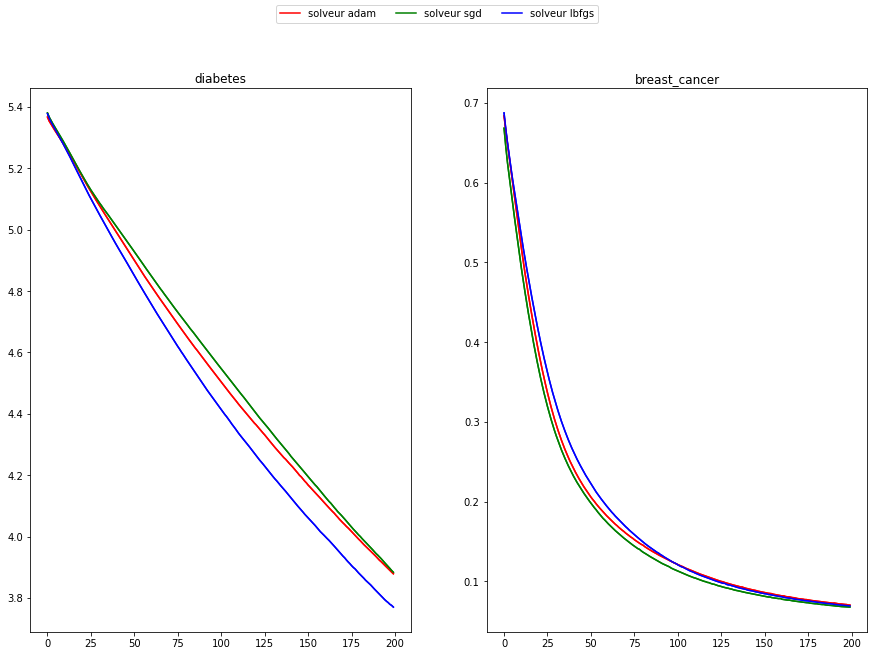

In [59]:
################################################################################################################
#########################################     2. SOLVER     ####################################################
################################################################################################################

import warnings
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# Les 3 differentes valeurs du paramètre solver 
params = [
    {"solver": "adam",},
    {"solver": "sgd",},
    {"solver": "lbfgs",},
]  
labels = [
    "solveur adam",
    "solveur sgd",
    "solveur lbfgs",
]
plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
]

# pour chaque dataset, voir les Effets de variation du paramètre Solver sur la métrique de qualité : loss 
print("\n #Effets de variation du paramètre Solver sur la métrique de qualité sélctionnée : loss avant (Resp aprés) la normalisation de la métriques sur le dataset de classification breast_cancer (Resp le dataset de régression diabetes)")

def plot_on_dataset(X, y, ax, name):

    print('_________________________________________________________________________________________')
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    
    #CLASSIFICATION
    for label, param in zip(labels, params):
        print("Apprentissage avec le %s" % label)
        mlp = MLPClassifier()

        #certaines combinaisons de paramètres ne convergeront pas comme on peut le voir sur les grapges 
        #donc elles seront ignorées ici
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)


        mlps.append(mlp)
        #print("Score (CLASSIFICATION): %f" % mlp.score(X, y))
        print("Loss (CLASSIFICATION) : %f" % mlp.loss_)
        print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)

    print('_________________________________________________________________________________________')
    

    #REGRESSION
    for label, param in zip(labels, params):
        print("Apprentissage avec le %s" % label)
        mlp = MLPRegressor()

        #certaines combinaisons de paramètres ne convergeront pas comme on peut le voir sur les grapges 
        #donc elles seront ignorées ici
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        #print("Score (REGRESSION): %f" % mlp.score(X, y))
        print("Loss (REGRESSION): %f" % mlp.loss_)
        print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)
         #ax.plot(mlp.score_curve_, label=label, **args)


#visualiser les deux graphes sur la meme ligne
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
#télécharger datasets
diabetes = datasets.load_diabetes()
breast_cancer = datasets.load_breast_cancer()
data_sets = [
    (diabetes.data, diabetes.target),
    (breast_cancer.data, breast_cancer.target),
]

for ax, data, name in zip(
    axes.ravel(), data_sets, ["diabetes", "breast_cancer"]
):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()


 #Effets de variation du paramètre Learning_rate sur la métrique de qualité sélctionnée : loss avant (Resp aprés) la normalisation de la métriques sur le dataset de classification breast_cancer (Resp le dataset de régression diabetes)
_________________________________________________________________________________________
Apprentissage avec learning_rate constant
Loss (CLASSIFICATION) : 3.885058
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Apprentissage avec learning_rate invscaling
Loss (CLASSIFICATION) : 3.939947
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Apprentissage avec learning_rate adaptative
Loss (CLASSIFICATION) : 3.928486
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_________________________________________________________________________________________
Apprentissage avec learning_rate constant
Loss (REGRESSION): 2414.577721
_ _

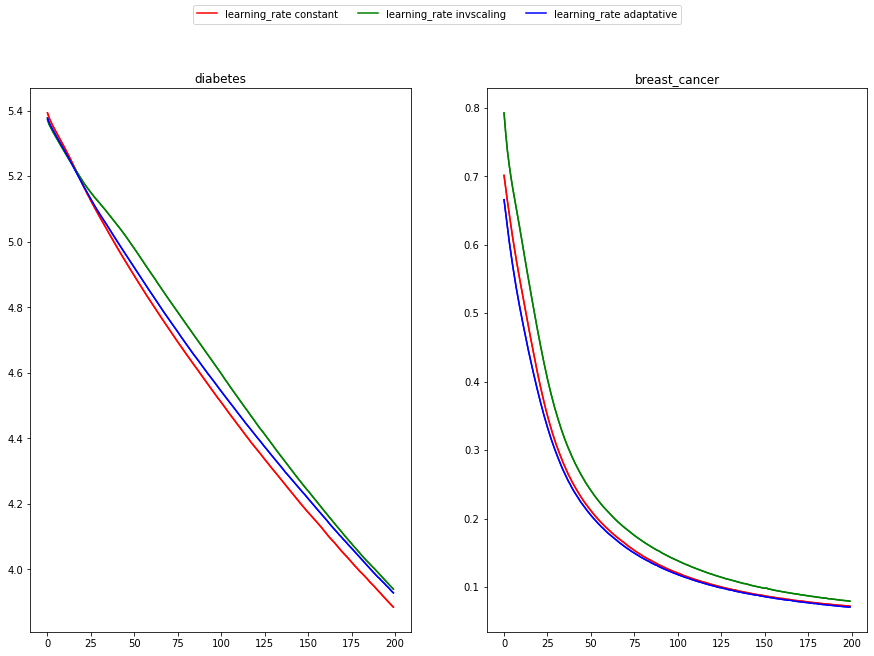

In [66]:
################################################################################################################
####################################     3. LEARNING_RATE     ##################################################
################################################################################################################

import warnings
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# Les 3 differentes valeurs du paramètre learning_rate 
params = [
    {"learning_rate": "constant",},
    {"learning_rate": "invscaling",},
    {"learning_rate": "adaptative",},
]  
labels = [
    "learning_rate constant",
    "learning_rate invscaling",
    "learning_rate adaptative",
]
plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
]

# pour chaque dataset, voir les Effets de variation du paramètre Solver sur la métrique de qualité : loss 
print("\n #Effets de variation du paramètre Learning_rate sur la métrique de qualité sélctionnée : loss avant (Resp aprés) la normalisation de la métriques sur le dataset de classification breast_cancer (Resp le dataset de régression diabetes)")

def plot_on_dataset(X, y, ax, name):

    print('_________________________________________________________________________________________')
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    
    #CLASSIFICATION
    for label, param in zip(labels, params):
        print("Apprentissage avec %s" % label)
        mlp = MLPClassifier()

        #certaines combinaisons de paramètres ne convergeront pas comme on peut le voir sur les grapges 
        #donc elles seront ignorées ici
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)


        mlps.append(mlp)
        #print("Score (CLASSIFICATION): %f" % mlp.score(X, y))
        print("Loss (CLASSIFICATION) : %f" % mlp.loss_)
        print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)

    print('_________________________________________________________________________________________')
    

    #REGRESSION
    for label, param in zip(labels, params):
        print("Apprentissage avec %s" % label)
        mlp = MLPRegressor()

        #certaines combinaisons de paramètres ne convergeront pas comme on peut le voir sur les grapges 
        #donc elles seront ignorées ici
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        #print("Score (REGRESSION): %f" % mlp.score(X, y))
        print("Loss (REGRESSION): %f" % mlp.loss_)
        print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)
         #ax.plot(mlp.score_curve_, label=label, **args)


#visualiser les deux graphes sur la meme ligne
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
#télécharger datasets
diabetes = datasets.load_diabetes()
breast_cancer = datasets.load_breast_cancer()
data_sets = [
    (diabetes.data, diabetes.target),
    (breast_cancer.data, breast_cancer.target),
]

for ax, data, name in zip(
    axes.ravel(), data_sets, ["diabetes", "breast_cancer"]
):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()


 #Effets de variation du paramètre Max_iter sur la métrique de qualité sélctionnée : loss avant (Resp aprés) la normalisation de la métriques sur le dataset de classification breast_cancer (Resp le dataset de régression diabetes)
_________________________________________________________________________________________
Apprentissage avec max_iter 200
Loss (CLASSIFICATION) : 3.874557
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Apprentissage avec max_iter 20000
Loss (CLASSIFICATION) : 3.807539
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Apprentissage avec max_iter 30000
Loss (CLASSIFICATION) : 3.806423
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
_________________________________________________________________________________________
Apprentissage avec max_iter 200
Loss (REGRESSION): 2458.837566
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

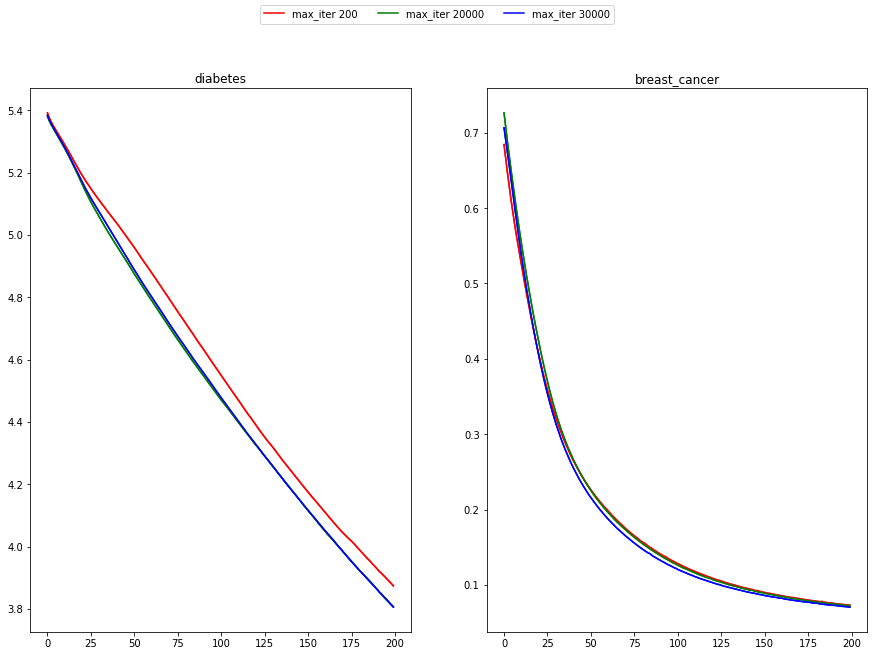

In [75]:
################################################################################################################
######################################     4. MAX_ITER     #####################################################
################################################################################################################

import warnings
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# Les valeurs du paramètre max_iter 
params = [
    {"max_iter": 200,},
    {"max_iter": 2000,},
    {"max_iter": 3000,},
]  
labels = [
    "max_iter 200",
    "max_iter 20000",
    "max_iter 30000",
]
plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
]

# pour chaque dataset, voir les Effets de variation du paramètre Solver sur la métrique de qualité : loss 
print("\n #Effets de variation du paramètre Max_iter sur la métrique de qualité sélctionnée : loss avant (Resp aprés) la normalisation de la métriques sur le dataset de classification breast_cancer (Resp le dataset de régression diabetes)")

def plot_on_dataset(X, y, ax, name):

    print('_________________________________________________________________________________________')
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    
    #CLASSIFICATION
    for label, param in zip(labels, params):
        print("Apprentissage avec %s" % label)
        mlp = MLPClassifier()

        #certaines combinaisons de paramètres ne convergeront pas comme on peut le voir sur les grapges 
        #donc elles seront ignorées ici
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)


        mlps.append(mlp)
        #print("Score (CLASSIFICATION): %f" % mlp.score(X, y))
        print("Loss (CLASSIFICATION) : %f" % mlp.loss_)
        print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)

    print('_________________________________________________________________________________________')
    

    #REGRESSION
    for label, param in zip(labels, params):
        print("Apprentissage avec %s" % label)
        mlp = MLPRegressor()

        #certaines combinaisons de paramètres ne convergeront pas comme on peut le voir sur les grapges 
        #donc elles seront ignorées ici
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        #print("Score (REGRESSION): %f" % mlp.score(X, y))
        print("Loss (REGRESSION): %f" % mlp.loss_)
        print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)
         #ax.plot(mlp.score_curve_, label=label, **args)


#visualiser les deux graphes sur la meme ligne
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
#télécharger datasets
diabetes = datasets.load_diabetes()
breast_cancer = datasets.load_breast_cancer()
data_sets = [
    (diabetes.data, diabetes.target),
    (breast_cancer.data, breast_cancer.target),
]

for ax, data, name in zip(
    axes.ravel(), data_sets, ["diabetes", "breast_cancer"]
):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

In [76]:
# On remarque que les valeurs des paramètres qui minimisent plus la LOSS pour la classification, ainsi, que pour 
# la régression correspondent bien aux valeurs des paramètres des deux meilleurs modèles sélectionnées par la
# méthode GridSearchCV
# Pour la classification : {'activation': 'logistic', 'learning_rate': 'constant', 'max_iter': 3000, 'solver': 'lbfgs'}
# Pour la régression : {'activation': 'tanh', 'learning_rate': 'adaptative', 'max_iter': 3000, 'solver': 'sgd'}